**Neural Networks for Handwritten Digit Recognition, Multiclass**

Use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,sigmoid,linear

In [3]:
x_train = np.load(r"C:\Users\ABHIJITH\Downloads\X.npy")
y_train = np.load(r"C:\Users\ABHIJITH\Downloads\y.npy")

In [4]:
print(x_train.shape)
print(y_train.shape)

(5000, 400)
(5000, 1)


In [5]:
print(x_train[0,:])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [6]:
print(y_train[:5,:])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [7]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

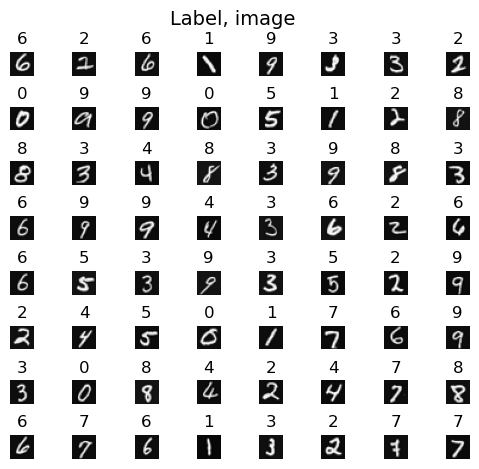

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [9]:
tf.random.set_seed(1234)

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25,activation='relu',name='L1'),
        Dense(15,activation='relu',name='L2'),
        Dense(10,activation='linear',name='L3')
    ]
)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [12]:
history = model.fit(x_train,y_train,epochs=40)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5986
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6283
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4221
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3450
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2991
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2678
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2433
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2231
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2057
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1910
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1782
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1670
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1565
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1465
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

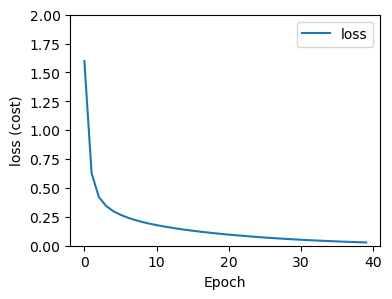

In [19]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
plt.show()

In [21]:
image_of_two = x_train[1015]

prediction = model.predict(image_of_two.reshape(1,400))

print(prediction)

print(f"Predicted: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[ -6.082099    1.7492404   5.232328   -0.8601096 -10.357756   -5.657991
   -6.694075    0.6666939  -6.504483   -6.8018837]]
Predicted: 2


In [23]:
#To get the actual probability use softmax

prediction_p = tf.nn.softmax(prediction)
print(prediction_p)
print(f"Predicted: {np.argmax(prediction_p)}")

tf.Tensor(
[[1.1688127e-05 2.9434197e-02 9.5838034e-01 2.1658370e-03 1.6249889e-07
  1.7862099e-05 6.3382136e-06 9.9703036e-03 7.6613587e-06 5.6904419e-06]], shape=(1, 10), dtype=float32)
Predicted: 2
